# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:/Users/asus/Documents/Work/Projects/Career Foundry/Data Analysis Immersion - Achievement 6/us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:/Users/asus/Documents/Work/Projects/Career Foundry/Data Analysis Immersion - Achievement 6/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
path = 'C:/Users/asus/Documents/Career Foundry/Achievement 6'

In [6]:
# Import the recipes data

df = pd.read_csv(os.path.join(path, '6.3 Images & Assets', 'Data', 'recipes.csv'))

In [7]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.shape

(20052, 680)

### 2. Data wrangling 

##### Fix dummy columns

In [9]:
# Select only the necessary columns and put them in a list called columns

columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin",
"title",
"rating",
"calories",
"protein",
"fat",
"sodium"
]

In [10]:
# Create a subset

state_rec = df[columns]

In [11]:
state_rec.head()

,alabama,alaska,arizona,california,colorado,connecticut,florida,georgia,hawaii,idaho,...,virginia,washington,west virginia,wisconsin,title,rating,calories,protein,fat,sodium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0


In [12]:
# Select only the states from state_rec in a new subset

states_num = state_rec[["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"]]

In [13]:
# This command turns the dummy data from the states columns into a categorical variable in s2, which is a pandas Series data structure

s2 = states_num.idxmax(axis=1)

# You have not encountered Series yet, but it is another pandas data structure. It is similar to a dataframe, but it is 
# one-dimensional - this means it can only have one column, whereas a dataframe is two dimensional. You can turn any dataframe
# column into series and you can add series to a dataframe as a column!

In [14]:
s2

0           alabama
1           alabama
2          new york
3           alabama
4        california
            ...    
20047       alabama
20048       alabama
20049       alabama
20050       alabama
20051       alabama
Length: 20052, dtype: object

In [15]:
type(s2)

pandas.core.series.Series

In [16]:
# Create new column 'state' in the state_rec dataframe

state_rec['STATE_NAME'] = s2

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
state_rec.columns

Index(['alabama', 'alaska', 'arizona', 'california', 'colorado', 'connecticut',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa',
       'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'nebraska',
       'new hampshire', 'new jersey', 'new mexico', 'new york',
       'north carolina', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode island', 'south carolina', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin',
       'title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       'STATE_NAME'],
      dtype='object')

In [18]:
# Drop the dummy columns from the dataframe

state_rec.drop(columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"], inplace = True)

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
state_rec.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       'STATE_NAME'],
      dtype='object')

In [20]:
state_rec.head()

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,new york
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,california


In [21]:
type(state_rec)

pandas.core.frame.DataFrame

In [22]:
state_rec['STATE_NAME'] = state_rec['STATE_NAME'].str.title()

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
state_rec.head()

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,Alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,Alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,New York
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,Alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,California


### 3. Conduct consistency checks

In [24]:
# Check for missing values

state_rec.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
sodium        4119
STATE_NAME       0
dtype: int64

In [25]:
# Impute missing values with median

state_rec['calories'].fillna(state_rec['calories'].median(), inplace=True)
state_rec['protein'].fillna(state_rec['protein'].median(), inplace=True)
state_rec['fat'].fillna(state_rec['fat'].median(), inplace=True)
state_rec['sodium'].fillna(state_rec['sodium'].median(), inplace=True)

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
# Last check for NaN

state_rec.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
sodium        0
STATE_NAME    0
dtype: int64

##### Duplicates check

In [27]:
dups = state_rec.duplicated()

In [28]:
dups.shape # no dups

(20052,)

##### Extreme values checks

<AxesSubplot:xlabel='fat', ylabel='Count'>

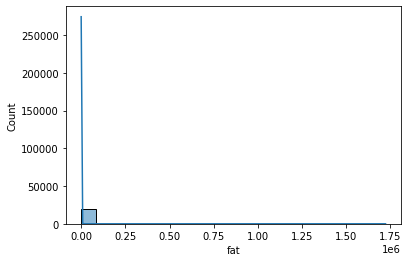

In [29]:
sns.histplot(state_rec['fat'], bins=20, kde = True) # shows extreme values for 'fat'

In [30]:
# Check how many extreme values

state_rec[state_rec['fat'] >1000]

,title,rating,calories,protein,fat,sodium,STATE_NAME
1304,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,4157357.0,236489.0,221495.0,3134853.0,Alabama
1837,Bacon-Wrapped Trout Stuffed with Balsamic Onio...,4.375,12010.0,403.0,1115.0,18212.0,Alabama
2976,Lamb Köfte with Tarator Sauce,5.000,4518216.0,166471.0,44198.0,7540990.0,Alabama
3280,Braised Short Ribs with Red Wine Gravy,3.750,19576.0,723.0,1818.0,2950.0,Alabama
5138,Caramelized Apple and Pear Pie,3.125,3358029.0,58324.0,186642.0,3449373.0,Alabama
6368,Deep-Dish Wild Blueberry Pie,4.375,29997918.0,200210.0,1716279.0,27570999.0,Alabama
6645,Braised Orange-Ginger Short Ribs with Dried Ap...,4.375,16050.0,592.0,1480.0,2629.0,Alabama
6912,Chocolate-Almond Pie,3.125,3358273.0,58334.0,186660.0,3449512.0,Alabama
8192,Grilled Lamb Chops with Porcini Mustard,5.000,24117.0,940.0,2228.0,4382.0,Alabama
8873,Grilled Cumin Chicken Breasts with Avocado Salsa,3.750,22312.0,332.0,1007.0,13820.0,Alabama


In [31]:
# Clean extreme values

state_rec = state_rec[state_rec['fat'] < 500] 
# 500 was picked because it is beyond belief there could be a meal with over 500 gr of fat!

In [32]:
state_rec.shape

(20012, 7)

In [33]:
# Create a 'cal_per_portion' column

state_rec['cal_per_portion'] = state_rec['calories']*4

<AxesSubplot:xlabel='cal_per_portion', ylabel='Count'>

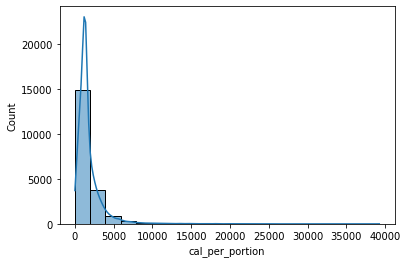

In [34]:
sns.histplot(state_rec['cal_per_portion'], bins=20, kde = True)  # shows extreme values for 'cal_per_portion'

In [35]:
# Clean extreme values in 'cal_per_portion'

state_rec = state_rec[state_rec['cal_per_portion'] < 8000]

<AxesSubplot:xlabel='rating', ylabel='Count'>

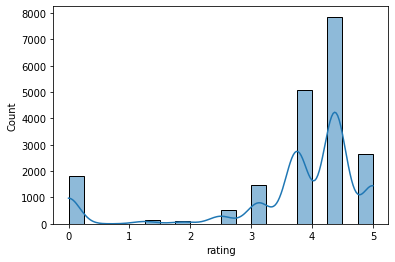

In [36]:
# Check the rating variable

sns.histplot(state_rec['rating'], bins=20, kde = True)

In [37]:
# Select only entries with a non-zero rating

state_rec = state_rec[state_rec['rating'] >= 1]

In [38]:
state_rec.dtypes

title               object
rating             float64
calories           float64
protein            float64
fat                float64
sodium             float64
STATE_NAME          object
cal_per_portion    float64
dtype: object

### 4. Plotting a choropleth

In [39]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = state_rec[['STATE_NAME','rating']]
data_to_plot.head()

,STATE_NAME,rating
0,Alabama,2.500
1,Alabama,4.375
2,New York,3.750
3,Alabama,5.000
4,California,3.125


In [40]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE_NAME', 'rating'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [41]:
map.save('plot_data.html')